<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/CrossValidation_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from datetime import datetime


In [ ]:
data = pd.read_csv("C:\\Users\\nikhilran\\Desktop\\HealthCareExperiments\\N\\JMH_Data_V1.csv")

In [ ]:
data['LIST DT']=pd.to_datetime(data['LIST DT'])
data['LIST DT'] = data['LIST DT'].apply(lambda x: x.toordinal())

data['ADMIT DT']=pd.to_datetime(data['ADMIT DT'])
data['ADMIT DT'] = data['ADMIT DT'].apply(lambda x: x.toordinal())

data['DSCHG DT']=pd.to_datetime(data['DSCHG DT'])
data['DSCHG DT'] = data['DSCHG DT'].apply(lambda x: x.toordinal())

data['DOB']=pd.to_datetime(data['DOB'])
data['DOB'] = data['DOB'].apply(lambda x: x.toordinal())

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
data1 = pd.DataFrame(imp.fit_transform(data),columns=data.columns, index=data.index)
#print(imp.fit_transform(data))

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(data1['Payment Status']==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(data1['Payment Status']==0)))



Before OverSampling, counts of label '1': 7793
Before OverSampling, counts of label '0': 48323 



In [ ]:
# Separate majority and minority classes
df_majority = data1[data1['Payment Status']==0]
df_minority = data1[data1['Payment Status']==1]

In [ ]:
from sklearn.utils import resample

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=48323,    # to match majority class
                                 random_state=123) # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(df_upsampled['Payment Status']==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(df_upsampled['Payment Status']==0)))

After OverSampling, counts of label '1': 48323
After OverSampling, counts of label '0': 48323 



In [ ]:
X = df_upsampled.drop(columns=['Payment Status'])
#x = x1.drop(columns=['IA SCORE'])

In [ ]:
y = df_upsampled['Payment Status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
clf = rfc.fit(X_train,y_train)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# 10-Fold Cross validation
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10,scoring='recall')))

0.9851677213751138


In [ ]:
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10,scoring='accuracy')))

0.9665338438535713


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # number of features at every split
# max_features = ['auto','sqrt']

# # max depth
# max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
# max_depth.append(None)

# # create random grid
# random_grid = {
#  'n_estimators':n_estimators,
#  'max_features':max_features,
#  'max_depth':max_depth
#  }
# # Random search of parameters
# rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the model
# rfc_random.fit(X_train, y_train)
# # print results
# print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 102.1min


In [ ]:
y_pred=clf.predict(X_test)
y_true = y_test

In [ ]:
#y_pred.to_frame()
#print(y_pred)
np.savetxt("C:\\Users\\nikhilran\\Desktop\\HealthCareExperiments\\N\\RandomForestPrediction1.csv",y_pred, delimiter=",")

In [ ]:
prob = clf.predict_proba(X_test)

In [ ]:
probs = prob[:, 1]

In [ ]:
print(probs)

[0.  0.9 0.1 ... 0.  0.  0. ]


In [ ]:
print(y_pred.astype(int))

[0 1 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
auc1 = roc_auc_score(y_test, probs)
print(auc1)

0.9940258725777023


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
#roc_auc = auc(fpr, tpr)


In [ ]:
print(fpr)
print(tpr)
print(thresholds)

[0.        0.003625  0.0115    0.02025   0.0325625 0.0493125 0.079125
 0.125625  0.206     0.3440625 0.586875  1.       ]
[0.         0.84176419 0.93557317 0.967472   0.98338996 0.98955581
 0.99207248 0.99389707 0.99591041 0.99767208 0.99905625 1.        ]
[2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


In [ ]:
print(sklearn.metrics.auc(fpr,tpr))

0.9940258725777023


In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test,probs)
print(sklearn.metrics.auc(fp_rate, tp_rate))

0.9940258725777023


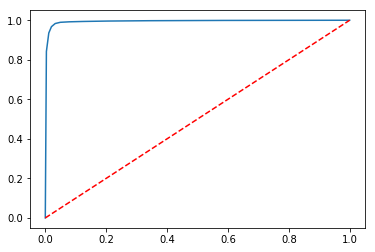

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fp_rate,tp_rate)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [ ]:
print(y_pred)

[0. 1. 0. ... 0. 0. 0.]


In [ ]:
from sklearn import metrics

In [ ]:
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy = metrics.accuracy_score(y_test,y_pred)
acc = Accuracy*100

In [ ]:
print("Accuracy:",acc,"%")

Accuracy: 97.00570640245815 %


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[15211   789]
 [  166 15728]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     16000
         1.0       0.95      0.99      0.97     15894

   micro avg       0.97      0.97      0.97     31894
   macro avg       0.97      0.97      0.97     31894
weighted avg       0.97      0.97      0.97     31894



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

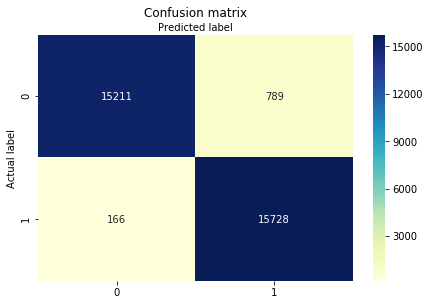

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
a = sklearn.metrics.precision_score(y_test,y_pred)

In [ ]:
print(a)

0.9522310346915299


In [ ]:
b = sklearn.metrics.recall_score(y_test,y_pred)

In [ ]:
print(b)

0.9895558072228514


In [ ]:
c = sklearn.metrics.f1_score(y_test,y_pred)
print(c)

0.9705346950109531


In [ ]:
# Increasing Recall 

y_pred_prob = probs.reshape(1,-1)

In [ ]:
print(y_pred_prob)

[[0.18222966 0.80534854 0.40558146 ... 0.43920773 0.40117844 0.45449081]]


In [ ]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob,0.40)[0]
print(y_pred_class.astype(int))

[0 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

         0.0       0.74      0.31      0.44     16000
         1.0       0.56      0.89      0.69     15894

   micro avg       0.60      0.60      0.60     31894
   macro avg       0.65      0.60      0.56     31894
weighted avg       0.65      0.60      0.56     31894



In [ ]:
cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred_class)
print(cnf_matrix1)

[[ 5012 10988]
 [ 1786 14108]]


Text(0.5, 257.44, 'Predicted label')

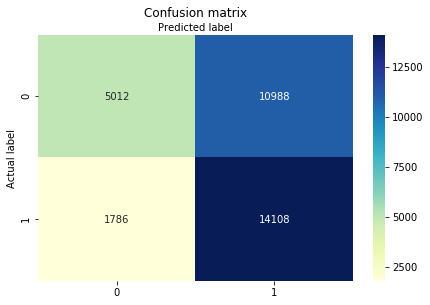

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
Accuracy = metrics.accuracy_score(y_test,y_pred_class)
acc = Accuracy*100
print(acc)

62.626199285132


In [ ]:
auc1 = roc_auc_score(, probs)
print(auc1)

0.7398450869825091
